In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class OlympicDataAnalyser:
    def __init__(self, file_path):
        self.file_path=file_path
        self.__open_file()
        
    def __open_file(self):
        self.df=pd.read_csv(self.file_path)
        
    def question_nr_1(self):
        #What countries receive the most medals nowadays? Does it change much across the timespan?
        medals = self.df.query('Medal.notna()')
        games_groups = medals.groupby(by='Games')
        years=list(self.df['Games'].unique())
        years.sort()

        for year in years:
            games=games_groups.get_group(year)
            games=games.groupby(by='Team')
            medals_table=games.size().to_frame('medals')
            top_countries=medals_table.sort_values(by='medals', ascending=False).head(3).index.values
            print('The most medals in {} was won by {}, {} and {}'.format(year, top_countries[0],top_countries[1],top_countries[2]))

    def question_nr_2(self):
        #Who wins the most medals? Women or men?
        men_with_medals=self.df.query('Sex == "M" and Medal.notna()')
        women_with_medals=self.df.query('Sex == "F" and Medal.notna()')
        men_score=len(men_with_medals)
        women_score=len(women_with_medals)
        result = 'men' if men_score>women_score else 'women'
        print('Men have won {} medals and women have won {}, so more medals are won by {}.'.format(men_score, women_score, result))

    def question_nr_3(self):
        #What’s the trend for the number of participants?
        self.__plot_games_groups_by_season('"Winter"')
        self.__plot_games_groups_by_season('"Summer"')

    def __plot_games_groups_by_season(self, season):
        query='Season == '+season
        games_groups=self.df.query(query)
        games_groups=games_groups.groupby(by='Year')
        games_df=games_groups['ID'].nunique().to_frame('participants')
        games_df=games_df.reset_index()
        x=games_df['Year']
        y=games_df['participants']
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)

        ax = plt.gca()
        games_df.plot.scatter(x='Year', y='participants', ax=ax, c=np.random.rand(1,3))
        plt.plot(x,p(x),"r--")

    def question_nr_4(self):
        #What is the relation between age and medals won?
        medals=self.df.query('Medal.notna()')
        age_group_df=medals.groupby(by='Age').size().to_frame('medals')
        age_group_df=age_group_df.reset_index()
        age_group_df.plot.scatter(x='Age', y='medals')
        
    def question_nr_5(self):
        tall_human=str(self.__define_the_tall_human())
        tall_with_medals=self.df.query('Height > '+tall_human+'and Medal.notna()')
        others_with_medals=self.df.query('Height <= '+tall_human+'and Medal.notna()')
        tall=self.df.query('Height > '+tall_human)
        others=self.df.query('Height <= '+tall_human)
        
        tall_ratio=round(len(tall_with_medals)/len(tall)*100,2)
        others_ratio=round(len(others_with_medals)/len(others)*100,2)
        print('{}% of tall participants won medals, when {}% of other participants won medals'.format(tall_ratio, others_ratio))
        
    def __define_the_tall_human(self):
        unique_id=self.df.drop_duplicates(subset=['ID'])
        height_df=unique_id.groupby(by='Height').size().to_frame('number').reset_index().sort_values(by='Height', ascending=False)
        number_of_people=height_df['number'].sum()
        number_of_tall_people=0.1*number_of_people # I assume that the 10% of the tallest peaople are tall.
        
        temp=0
        for index, row in height_df.iterrows():
            temp=temp+row['number']
            if temp>=number_of_tall_people:
                break
            else:
                tall_human=row['Height']
        return tall_human
    
    def question_nr_6(self):
        short_human=str(self.__define_the_short_human())
        sports_groups = self.df.groupby(by='Sport')
        sports=list(self.df['Sport'].unique())

        dominated_sports=[]
        for sport in sports:
            sport_df=sports_groups.get_group(sport)
            short_people=sport_df.query('Height < '+short_human)
            ratio=len(short_people)/len(sport_df)
            if ratio>0.4:
                dominated_sports.append(sport)
        
        print('Sports dominated by short people are: ')
        for sport in dominated_sports:
            print(sport)   
    
    def __define_the_short_human(self):
        unique_id=self.df.drop_duplicates(subset=['ID'])
        height_df=unique_id.groupby(by='Height').size().to_frame('number').reset_index().sort_values(by='Height', ascending=True)
        number_of_people=height_df['number'].sum()
        number_of_tall_people=0.25*number_of_people # I assume that the 25% of the shortest peaople are short in this case.
        
        temp=0
        
        for index, row in height_df.iterrows():
            temp=temp+row['number']
            if temp>=number_of_tall_people:
                break
            else:
                short_human=row['Height']
        return short_human

analyser=OlympicDataAnalyser('athlete_events.csv')

        
        

In [7]:
analyser.question_nr_1()

The most medals in 1896 Summer was won by Greece, Germany and United States
The most medals in 1900 Summer was won by France, United States and Union des Socits Franais de Sports Athletiques
The most medals in 1904 Summer was won by United States, Germany and Galt Football Club
The most medals in 1906 Summer was won by France, Denmark and Great Britain
The most medals in 1908 Summer was won by Great Britain, Sweden and United States
The most medals in 1912 Summer was won by Sweden, Great Britain and United States
The most medals in 1920 Summer was won by United States, Belgium and Sweden
The most medals in 1924 Summer was won by United States, France and Sweden
The most medals in 1924 Winter was won by Great Britain, Norway and Finland
The most medals in 1928 Summer was won by United States, Germany and Italy
The most medals in 1928 Winter was won by Sweden, Norway and Canada
The most medals in 1932 Summer was won by United States, Italy and Germany
The most medals in 1932 Winter was w

In [8]:
analyser.question_nr_2()

Men have won 28530 medals and women have won 11253, so more medals are won by men.


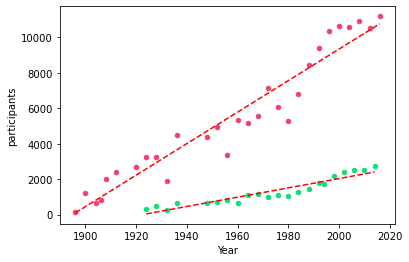

In [9]:
analyser.question_nr_3()

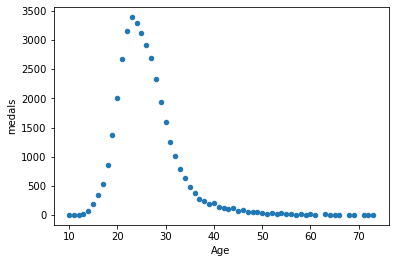

In [10]:
analyser.question_nr_4()

In [11]:
analyser.question_nr_5()

24.0% of tall participants won medals, when 14.14% of other participants won medals


In [12]:
analyser.question_nr_6()

Sports dominated by short people are: 
Gymnastics
Weightlifting
Diving
Softball
Synchronized Swimming
Rhythmic Gymnastics
Trampolining
Short Track Speed Skating
